# Implement a KNN model to classify the animals in to categorie

In [12]:
from pandas import read_csv
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import pandas as pd
from sklearn.model_selection import GridSearchCV,train_test_split
import numpy as np
import imblearn
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

In [26]:
data=pd.read_csv("Zoo.csv")
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


# EDA

In [27]:
# Rename the column 

data=data.rename({'animal name': 'animal_name'},axis=1)
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [29]:
data[data.duplicated()]

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


In [31]:
#label_encoding

from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
data['animal_name']=label_encoder.fit_transform(data['animal_name'])
data

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,95,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,96,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,97,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,98,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


<Axes: >

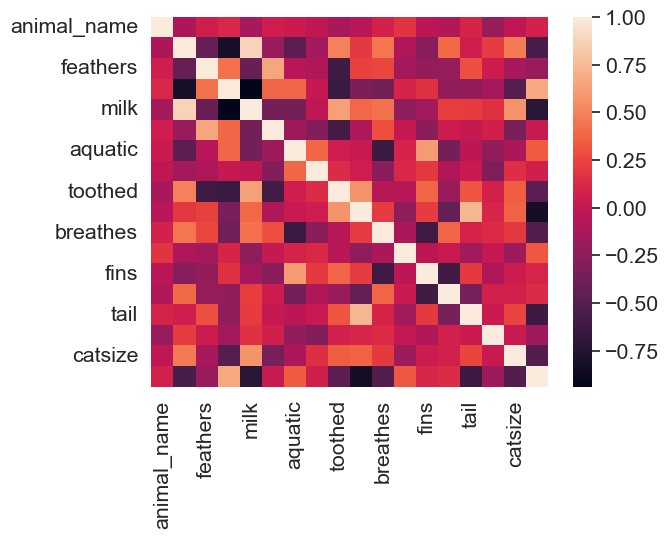

In [32]:
# Correlation matrix

cor = data.corr()
sns.heatmap(cor)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


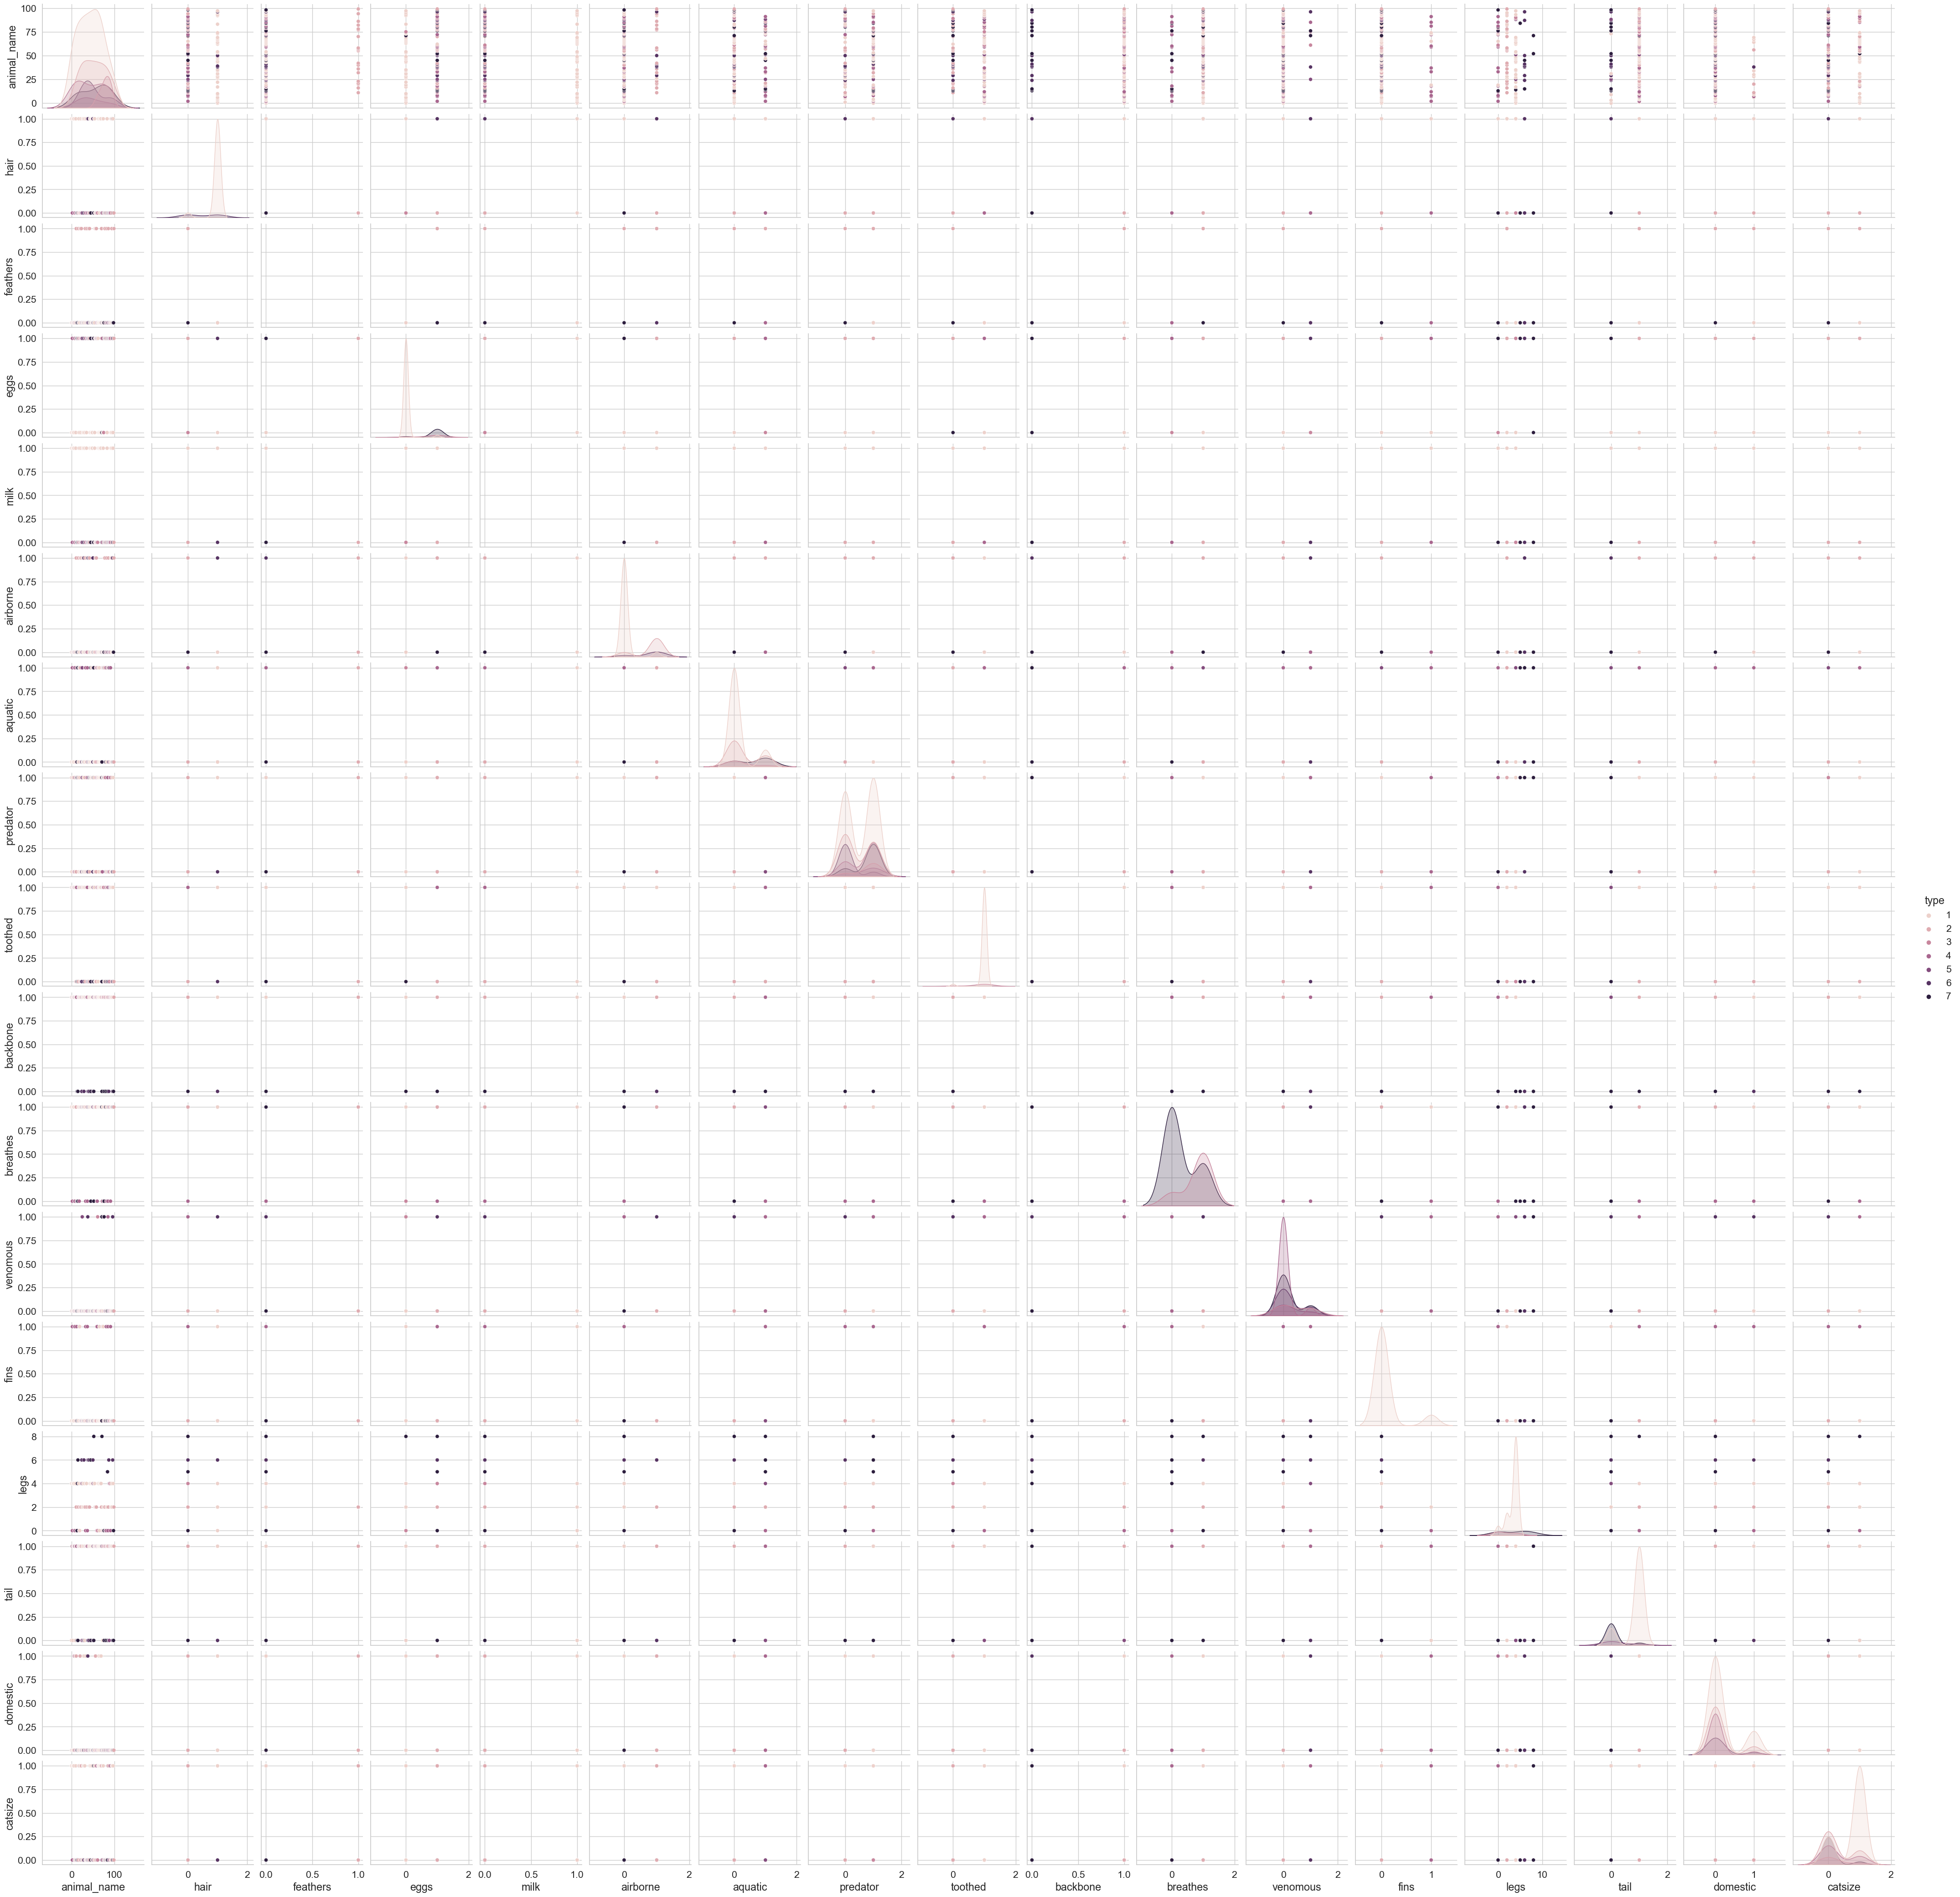

In [34]:
#pairwise plot of all the features

sns.pairplot(data,hue='type')
plt.show()

# Splitting data into x and y (independent and dependent)

In [35]:
x=data.drop('animal_name',axis=1)
x=x.drop('type',axis=1)
x.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [36]:
y=data['type']
y.head()

0    1
1    1
2    4
3    1
4    1
Name: type, dtype: int64

In [37]:
data.type.value_counts()

type
1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: count, dtype: int64

<Axes: xlabel='type', ylabel='count'>

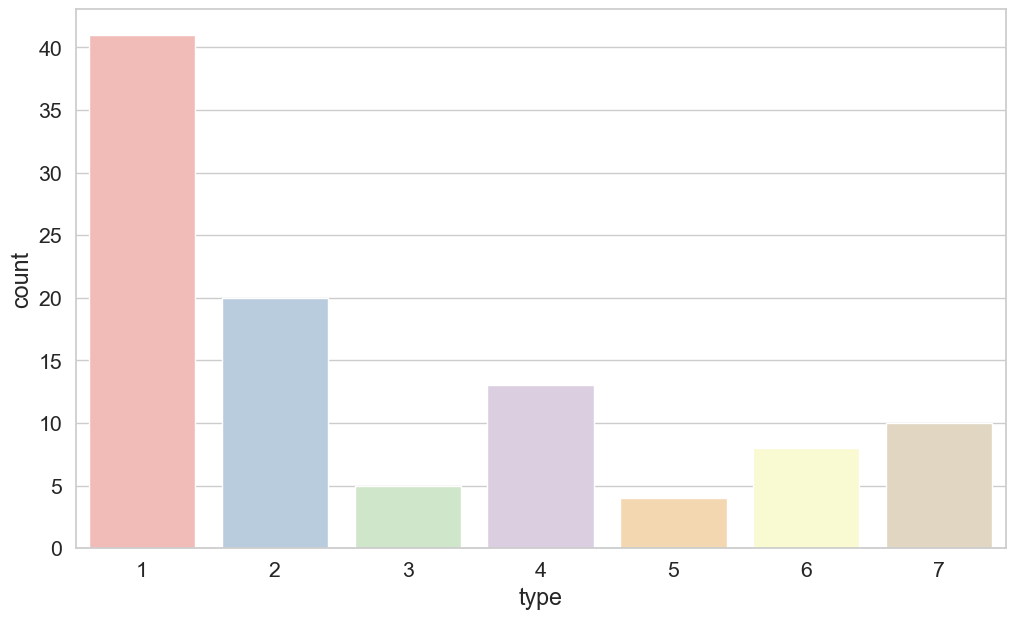

In [38]:
sns.set(style = 'whitegrid', font_scale = 1.4)
plt.subplots(figsize = (12,7))
sns.countplot(x = 'type', data = data, palette = 'Pastel1')

In [39]:
"""We could see that the type 1 counts is very high and there is huge difference between the next highest count wich is 20 for type 2.
And here classes are not evenly distributed, so it's an imbalanced dataset"""

"We could see that the type 1 counts is very high and there is huge difference between the next highest count wich is 20 for type 2.\nAnd here classes are not evenly distributed, so it's an imbalanced dataset"

# Applying KNN

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)

In [52]:
x_train.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
52,0,0,1,0,0,1,1,1,1,1,0,0,4,1,0,0
56,0,1,1,0,0,0,0,0,1,1,0,0,2,1,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
88,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0


In [53]:
x_test.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
20,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0
92,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1
34,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0
93,1,0,0,1,1,0,0,1,1,1,0,0,2,1,0,0
8,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0


In [54]:
y_train.head()

4     1
52    5
56    2
1     1
88    6
Name: type, dtype: int64

In [55]:
y_test.head()

20    2
92    4
34    4
93    1
8     4
Name: type, dtype: int64

In [56]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39])}

In [57]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [58]:
pred=model.predict(x_test)
pred

array([2, 4, 4, 1, 4, 1, 2, 6, 7, 1, 2, 4, 1, 2, 2, 1, 1, 2, 1, 1, 1],
      dtype=int64)

In [59]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.89      1.00      0.94         8
           2       1.00      1.00      1.00         6
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.81      0.83      0.82        21
weighted avg       0.91      0.95      0.93        21



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Finding the best K value

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\s

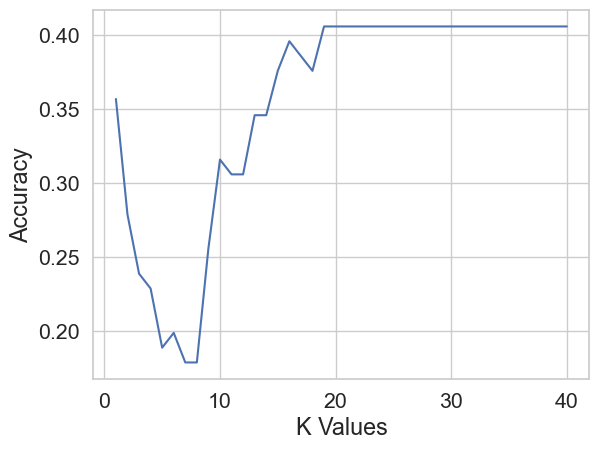

In [63]:
j=range(1,41)
l=[]
for k in j:
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    scores = cross_val_score(model,data,data['type'],cv=5,scoring='accuracy')
    l.append(scores.mean())
    
plt.plot(j,l)
plt.xlabel('K Values')
plt.ylabel('Accuracy')
plt.show()